# Heart Disease Classification 

This excercise involves building differnt classification models like 

- Logistic Regression,

- Decision (Classification) Tree

- Random Forest, and 

- Gradient Boosting

Optimizing the above models using Hyper-parameters and choosing the best model


<img src= "https://odh.ohio.gov/wps/wcm/connect/gov/2c667409-7fa9-4162-9382-64a3774a37ee/GettyImages-908453584+-+Landing+Page.jpg?MOD=AJPERES&CACHEID=ROOTWORKSPACE.Z18_K9I401S01H7F40QBNJU3SO1F56-2c667409-7fa9-4162-9382-64a3774a37ee-mqxZHeJ"/>


## Data Set Information:

This database contains 12 attributes, The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 

### Metadata:

-  **Age**,       Age of the Person
-  **Sex**,       Gender (Category)

                    - F = Female

                    - M = male

-  **ChestPainType**,        Chest Pain (Category)

                    - TA = typical angina

                    - ATA = atypical anigna

                    - NAP = non-anigna pain

                    - ASY = asymptomatic

-  **RestingBP**,   resting bp
-  **Cholesterol**,      cholestrol
-  **FastingBS**,       fasting blood suger (Category)

                    - 0 => 120mg/dl

                    - 1 =< 120mg/dl

-  **RestingECG**,   resting electrocardiographic results (Category)

                    - Normal = normal

                    - ST = having ST-T wave abnormality

                    - LHV = Showing probable or definite left ventricular hypertrophy

-  **MaxHR**,   Maximum heart rate achieved 
-  **ExerciseAngina**,     excercise induced angina (Category)

                    - N = no

                    - Y = yes

-  **Oldpeak**,   ST Depression induced by excercise relative to rest
-  **ST_Slope**,     The slope of the peak excercise ST Segment (Category)

                    - Up = unsloping

                    - Flat = flat

                    - Down = downsloping

-  **HeartDisease**, The predicted attribute

                    - 0 = for no heart deisease
                    
                    - 1 = if the person has heart disease

## Importing Modules

In [909]:
# data processing
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas

# Scipy
import scipy.stats as stats

# Modelling

from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier #To draw Classification Tree
from sklearn.tree import plot_tree # To draw a classification tree

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

sns.set(style='darkgrid')

## Importing Data

In [863]:
# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv("D:/D_ST/Git_Profile/Heart Disease Classification Models/Data/heart.csv")

#Peeking the data
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory Data Analysis

In [864]:
# Shape of Data
df.shape

(918, 12)

In [865]:
# Data Summary
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [866]:
# Summary of all numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [911]:
# Checking for Duplicates
len(df[df.duplicated()])

0

In [912]:
# Checking for null values in each column
df.isnull().sum().sum()

0

### Vizualizing data

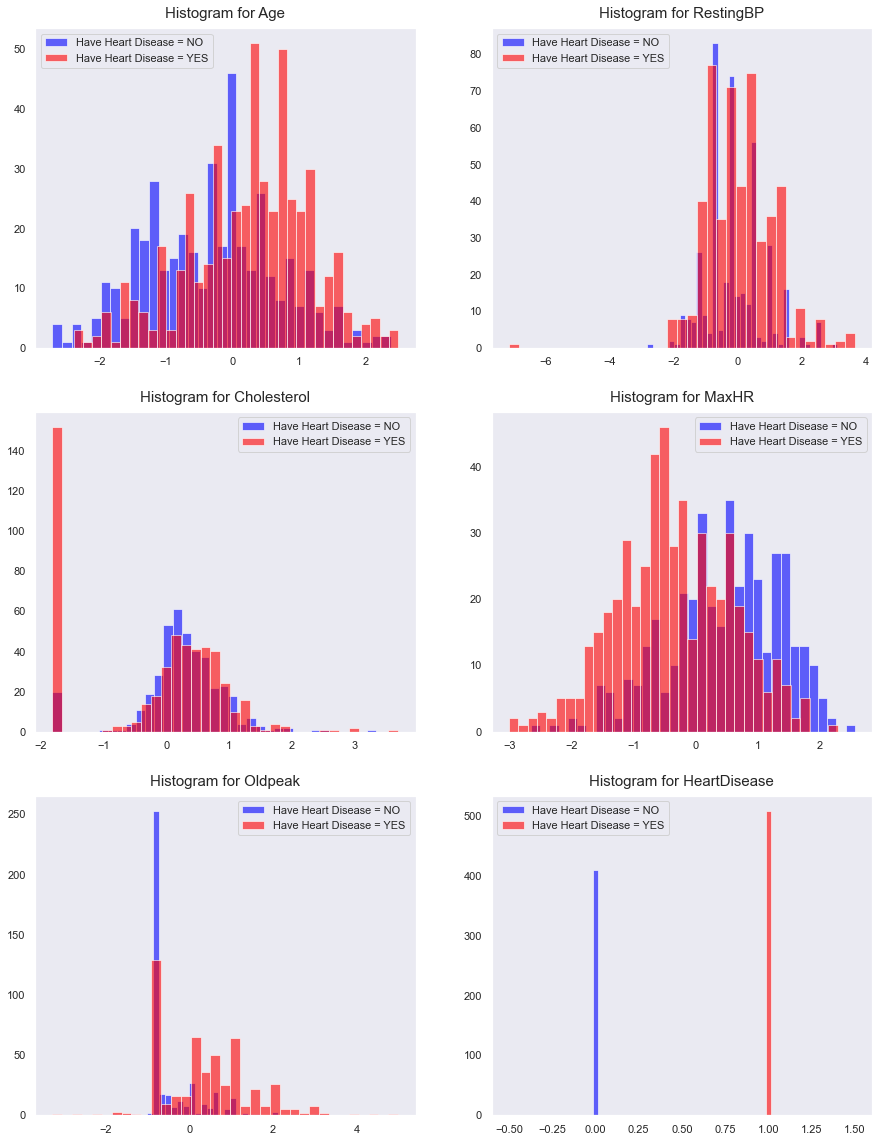

In [910]:
# Visualizing Numerical Columns
ncol = df.columns[df.dtypes !='object'].values
fig, axes= plt.subplots(nrows=3, ncols=2, figsize = (15,20))

for i, x in enumerate(axes.flat):
    column = ncol[i]
    df[df['HeartDisease'] == 0][column].hist(bins=35,ax=x, grid=False, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df['HeartDisease'] == 1][column].hist(bins=35,ax=x, grid=False, color='red', label='Have Heart Disease = YES', alpha=0.6)
    x.set_title(f"Histogram for {column}", size = 15, pad = 10)
    x.legend()

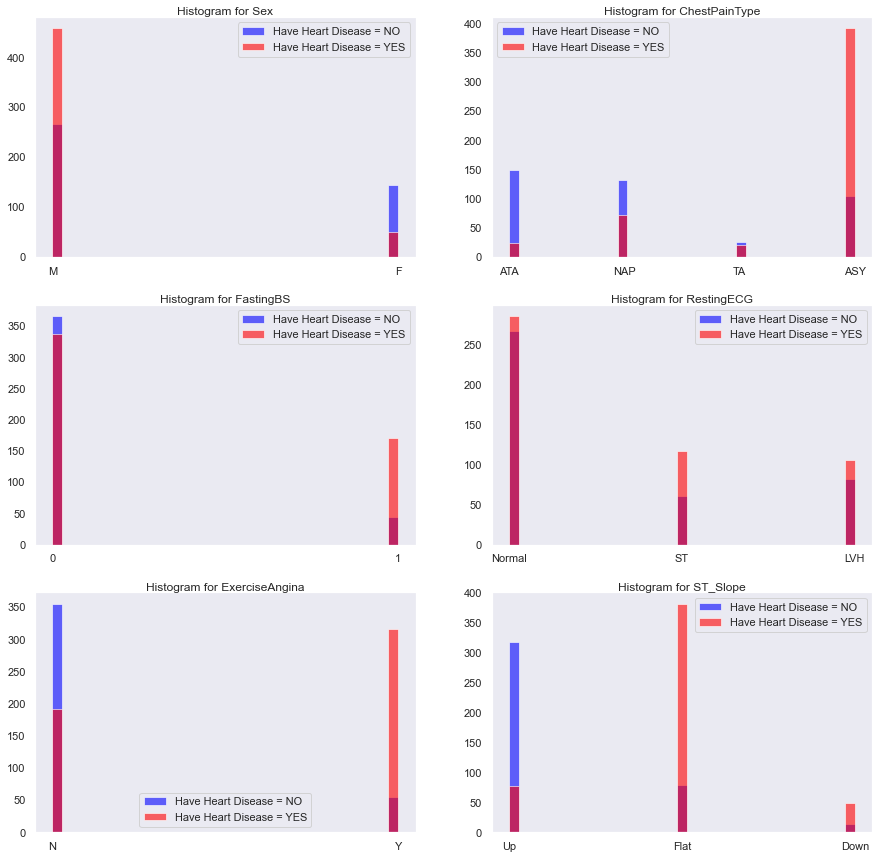

In [908]:
df['FastingBS'] = df['FastingBS'].astype(str)
df['HeartDisease'] = df['HeartDisease'].astype(int)

# Visualizing Categorical Variables
ncol = df.columns[df.dtypes =='object'].values
fig, axes= plt.subplots(nrows=3, ncols=2, figsize = (15,15))

for i, x in enumerate(axes.flat):
    column = ncol[i]
    df[df['HeartDisease'] == 0][column].hist(bins=35,ax=x, grid=False, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df['HeartDisease'] == 1][column].hist(bins=35,ax=x, grid=False, color='red', label='Have Heart Disease = YES', alpha=0.6)
    x.set_title(f"Histogram for {column}", size = 12, pad = 2)
    x.legend()

### Correlation

In [871]:
# Vizuzlizing Corr between Heart Disease and Num Features
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).hvplot.barh(
    width=600, height=400, 
    title="Corr between Heart Disease and Num Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

(6.5, -0.5)

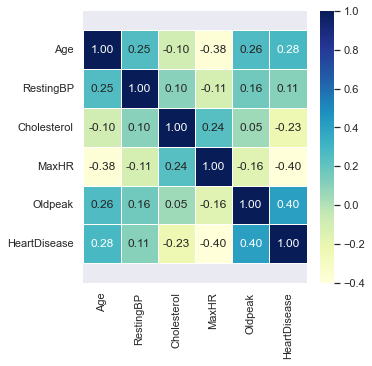

In [872]:
# Vizuzlizing Corr between Num Features
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Standardizing the Numerical Values

In [873]:
df['Age'] = stats.zscore(df['Age'])
df['RestingBP'] = stats.zscore(df['RestingBP'])
df['Cholesterol'] = stats.zscore(df['Cholesterol'])
df['MaxHR'] = stats.zscore(df['MaxHR'])
df['Oldpeak'] = stats.zscore(df['Oldpeak'])

In [874]:
# The Columns RestingBP , Cholestrol and Oldpeak has min value = 0

# Number of rows having value zero
# print("RestingBP",len(df.loc[df['RestingBP' ] == 0]))
# print("Cholesterol",len(df.loc[df['Cholesterol' ] == 0]))
#print("Oldpeak",len(df.loc[df['Oldpeak' ] == 0]))


#Replacing these zero values with 99th percentile value

# print(df['RestingBP'].quantile(0.01))
# print(df['Cholesterol'].quantile(0.01))
# print(df['Oldpeak'].quantile(0.01))

# df['RestingBP'] = df['RestingBP'].replace([0],df['RestingBP'].quantile(0.01))
# df['Cholesterol'] = df['Cholesterol'].replace([0],df['Cholesterol'].quantile(0.01))
# df['Oldpeak'] = df['Oldpeak'].replace([0],df['Oldpeak'].quantile(0.01))

#df.plot.box() # do we clean the outtliers

## Modeling Prep

In [875]:
# Columns with independent Variable
X = df.drop('HeartDisease', axis = 1)
X.head()

# Columns with Dependent (Response) Variable
Y = df['HeartDisease']
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int32

Since Sklearn does not handel Categorical variables we need to create dummy variables

In [876]:
# Creating dummy Variables for all categorical Variables except FastingBS, it is alreay 0 & 1
X_encoded = pd.get_dummies(X, columns = ['Sex', 'ChestPainType' , 
                                        'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [877]:
# Splitting into test and training dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(642, 20) (642,)
(276, 20) (276,)


# Logistic Regression

In [878]:
# Creating a Logistic Regression Model
logreg = LogisticRegression()

# Fit Logistic Regression Model
lrm = logreg.fit(X_train,Y_train)

# Predict on test set
Y_pred = lrm.predict(X_test)

In [879]:
#Accuracy Score
score = logreg.score(X_test, Y_test)

#AUC
AUC = roc_auc_score(Y_test, lrm.predict(X_test))

#Classification Report
cr = classification_report(Y_test, lrm.predict(X_test), output_dict=True)
cr = pd.DataFrame(cr).T

#Classification Matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

#Specificity/Precision
Precision = tn/(tn+fp)

#Sensitivity/Recall
Recall = tp/(tp+fn)

In [880]:
#Printing all the above values
print(f"Accuracy: {score*100: 0.3f} %")
print(f"AUC Score: {AUC: 0.3f}")


print("True Negative: ",tn )
print("True Positive: ",tp )
print("False Positive: ",fp )
print("False Negative: ",fn )

print(f"Specificity/Precision: {Precision: 0.3f}")
print(f"Sensitivity/Recall: {Recall: 0.3f}")

LR_cnf_matrix = confusion_matrix(Y_test, Y_pred)

#print("Classification Report: ")
#cr


Accuracy:  88.043 %
AUC Score:  0.881
True Negative:  99
True Positive:  144
False Positive:  13
False Negative:  20
Specificity/Precision:  0.884
Sensitivity/Recall:  0.878


Well, we got a classification rate of 88.4%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, it measures how good our model is when the prediction is positive. In this case the model precision is 89%.

Recall: measures how good our model is at correctly predicting positive classes. In this case the recall is 87.8%.

Calculating Different cutoff and checking the output

In [881]:
# Creating function to calculate Predicted Probability
def model_score(xbeta):
    return 1 / (1 + np.exp(-xbeta))

preds = lrm.predict_proba(X_test)[:,1]

# Creating function to calculate Accuracy, Precision and Recall for different cuttoff
def model_accuracy(n):
    
    cutoffs = np.linspace(0, 1, n)

    accu, recall, precision = [], [], []

    for cutoff in cutoffs:
        pred_class = [1 if p >= cutoff else 0 for p in preds]
        
        true_neg, false_pos, false_neg, true_pos = confusion_matrix(Y_test.astype(int), 
                                                                    pred_class).ravel()
        
        accu.append((true_pos + true_neg) / len(Y_test))
        recall.append(true_pos / (true_pos + false_neg))
        precision.append(true_neg / (true_neg + false_pos))

    return cutoffs, accu, recall, precision

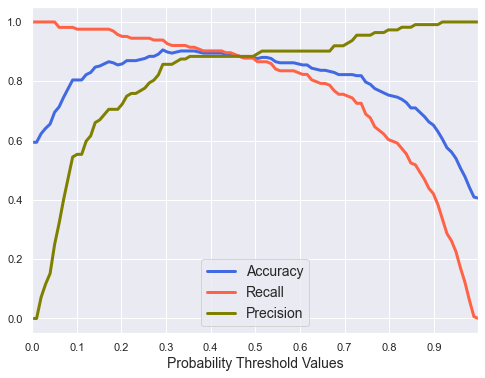

In [882]:
thresholds, accuracy, recall, precision = model_accuracy(100) 

#Visulaizing Accuracy, Recall and Precision
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracy, color='royalblue', lw=3, label='Accuracy')
plt.plot(thresholds, recall, color='tomato', lw=3, label='Recall')
plt.plot(thresholds, precision, color='olive', lw=3, label='Precision')
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel('Probability Threshold Values', fontsize = 14)
plt.legend(loc='best', fontsize = 14)
plt.show();

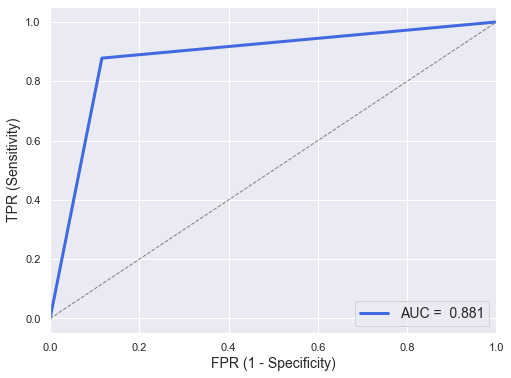

In [883]:
fpr, tpr, thres = roc_curve(Y_test.astype(int), Y_pred.astype(int))
auc = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='royalblue', lw=3, label=f'AUC = {auc: 0.3f}')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.xlabel('FPR (1 - Specificity)', fontsize = 14)
plt.ylabel('TPR (Sensitivity)', fontsize = 14)
plt.legend(loc='lower right', fontsize = 14)
plt.show();

# Decision(Classification) Tree

#### Preliminary Decision Tree

[Text(493.4120927762039, 526.6125000000001, 'ST_Slope_Up <= 0.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = Has HD'),
 Text(266.601097733711, 492.63750000000005, 'ChestPainType_ASY <= 0.5\ngini = 0.308\nsamples = 368\nvalue = [70, 298]\nclass = Has HD'),
 Text(168.9412181303116, 458.6625, 'Sex_F <= 0.5\ngini = 0.481\nsamples = 109\nvalue = [44, 65]\nclass = Has HD'),
 Text(100.77195467422095, 424.6875, 'MaxHR <= -0.012\ngini = 0.434\nsamples = 88\nvalue = [28, 60]\nclass = Has HD'),
 Text(42.679886685552404, 390.7125, 'RestingBP <= -1.075\ngini = 0.283\nsamples = 41\nvalue = [7, 34]\nclass = Has HD'),
 Text(33.195467422096314, 356.7375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No HD'),
 Text(52.164305949008494, 356.7375, 'ExerciseAngina_N <= 0.5\ngini = 0.255\nsamples = 40\nvalue = [6, 34]\nclass = Has HD'),
 Text(18.96883852691218, 322.76250000000005, 'Cholesterol <= 1.081\ngini = 0.077\nsamples = 25\nvalue = [1, 24]\nclass = Has HD'),
 Text(9.48441926345609, 28

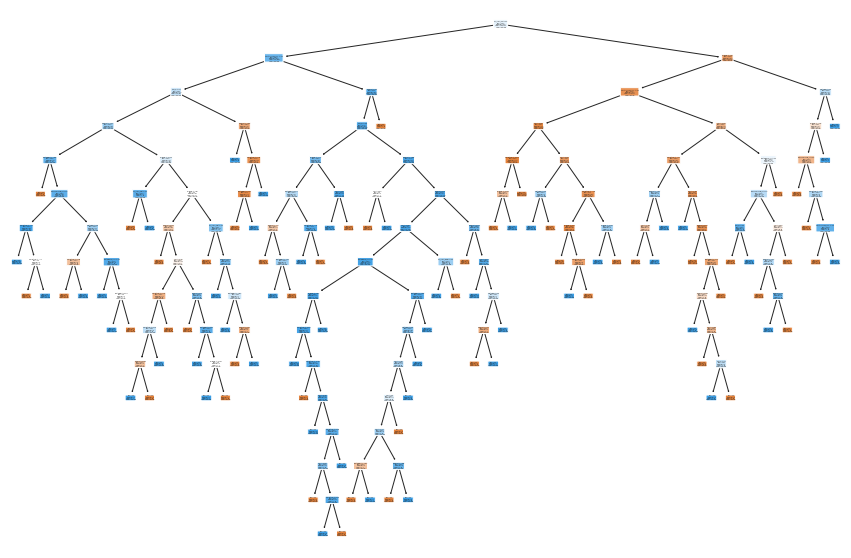

In [884]:
# creating a decision tree with training data set
dtm = DecisionTreeClassifier(random_state=42)
dtm = dtm.fit(X_train, Y_train)

# Vizualizing the tree we built
plt.figure(figsize= (15,10))
plot_tree(dtm, class_names= ["No HD","Has HD"],
                feature_names = X_encoded.columns, 
                filled= True,
                rounded= True)

#### Grid Search 
In order to optimize the model, we use grid search to find the best comn=bination of HyperParameters

In [885]:
# create a list of all parameters we want to test
param_grid = {'max_depth': [4, 5, 6], 'min_samples_leaf': [0.05, 0.03, 0.02]}

# define the gridsearch object
dtm_gs = GridSearchCV(dtm, param_grid, cv=5, verbose=2, n_jobs=-1)

# fit the model
dtm_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [0.05, 0.03, 0.02]},
             verbose=2)

In [886]:
# Best Parameters
print ('Best DT Parameters:', dtm_gs.best_params_) 

Best DT Parameters: {'max_depth': 4, 'min_samples_leaf': 0.02}


In [887]:
best_parm = dtm_gs.best_params_
optimal_max_depth = best_parm.get("max_depth")
optimal_min_samples_leaf = best_parm.get("min_samples_leaf")

#### Final decision tree model with optimized hyper Parameter

[Text(873.391304347826, 489.24, 'ST_Slope_Up <= 0.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = Has HD'),
 Text(400.30434782608694, 380.52000000000004, 'ChestPainType_ASY <= 0.5\ngini = 0.308\nsamples = 368\nvalue = [70, 298]\nclass = Has HD'),
 Text(218.3478260869565, 271.8, 'Sex_F <= 0.5\ngini = 0.481\nsamples = 109\nvalue = [44, 65]\nclass = Has HD'),
 Text(145.56521739130434, 163.08000000000004, 'MaxHR <= -0.012\ngini = 0.434\nsamples = 88\nvalue = [28, 60]\nclass = Has HD'),
 Text(72.78260869565217, 54.360000000000014, 'gini = 0.283\nsamples = 41\nvalue = [7, 34]\nclass = Has HD'),
 Text(218.3478260869565, 54.360000000000014, 'gini = 0.494\nsamples = 47\nvalue = [21, 26]\nclass = Has HD'),
 Text(291.1304347826087, 163.08000000000004, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = No HD'),
 Text(582.2608695652174, 271.8, 'Sex_F <= 0.5\ngini = 0.181\nsamples = 259\nvalue = [26, 233]\nclass = Has HD'),
 Text(436.695652173913, 163.08000000000004, 'MaxHR <= 0.42\ng

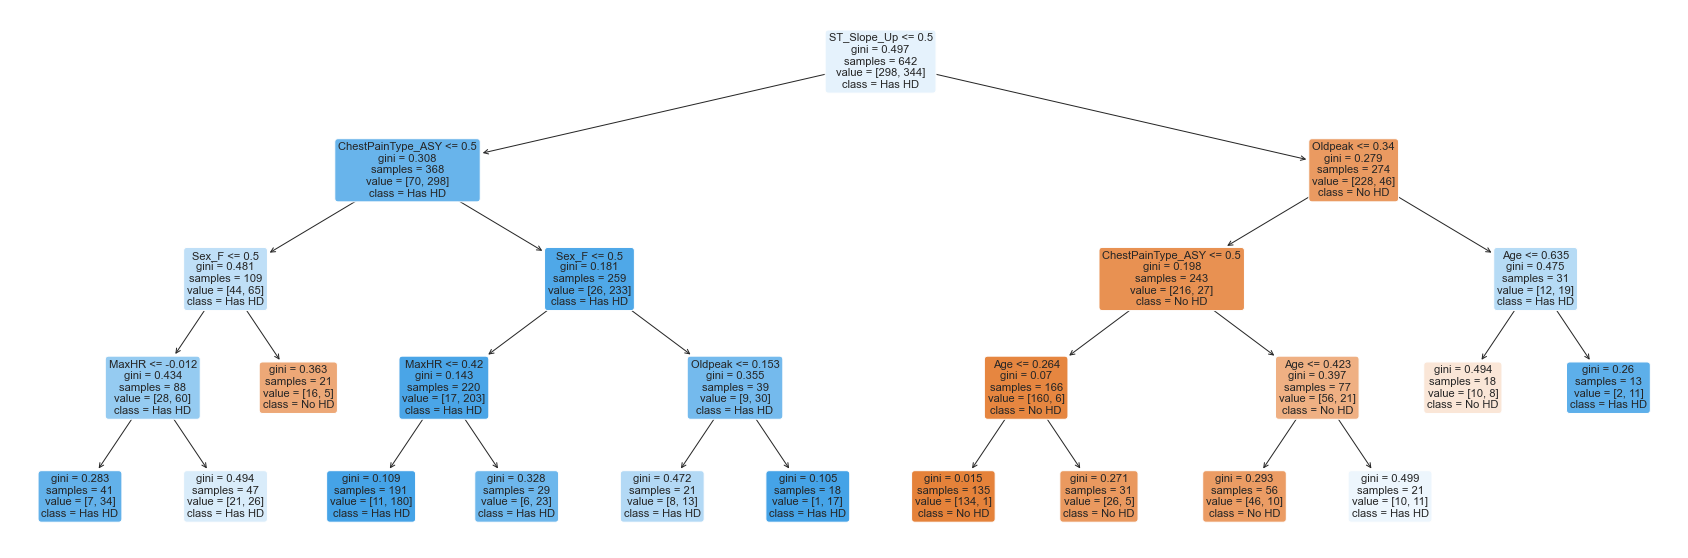

In [888]:
final_dtm = DecisionTreeClassifier( max_depth = optimal_max_depth ,
                                    min_samples_leaf = optimal_min_samples_leaf, 
                                    random_state= 42)
final_dtm_fit = final_dtm.fit(X_train, Y_train)

# Vizualizing the tree we built
plt.figure(figsize= (30,10))
plot_tree(final_dtm_fit, class_names= ["No HD","Has HD"],
                feature_names = X_encoded.columns, 
                filled= True,
                rounded= True)

#### Plotting AUC on training and Test set

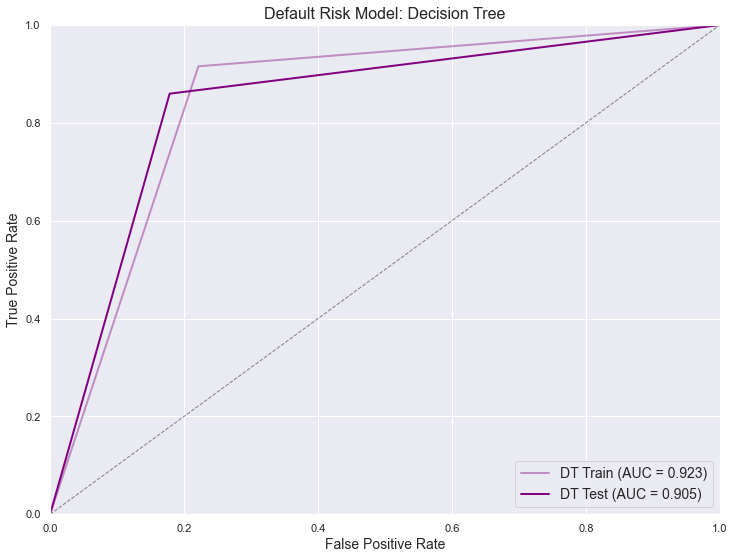

In [889]:
Y_pred_train = final_dtm.predict(X_train).astype(int)
Y_pred_test = final_dtm.predict(X_test).astype(int)

tree_scores_train = final_dtm.predict_proba(X_train)[:, 1]
tree_scores_test = final_dtm.predict_proba(X_test)[:, 1]

tree_fpr_train, tree_tpr_train, _ = roc_curve(Y_train.astype(int), Y_pred_train)
tree_fpr_test, tree_tpr_test, _ = roc_curve(Y_test.astype(int), Y_pred_test)

plt.figure(figsize=(12, 9))

plt.plot(tree_fpr_train, tree_tpr_train, color='purple', lw=2, alpha = 0.4, 
linestyle = '-', label=f'DT Train (AUC = {roc_auc_score(Y_train, tree_scores_train):0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'DT Test (AUC = {roc_auc_score(Y_test, tree_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Default Risk Model: Decision Tree', fontsize= 16)
plt.legend(loc='lower right', fontsize=14);

In [890]:
#Confusion Matrix
DT_cnf_matrix = confusion_matrix(Y_test.astype(int), Y_pred_test)

#AUC
print(f'DT Test AUC = {roc_auc_score(Y_train, tree_scores_train): 0.3f}')
print(f'DT Train AUC = {roc_auc_score(Y_test, tree_scores_test): 0.3f}')

DT Test AUC =  0.923
DT Train AUC =  0.905


# Random Forest

In [891]:
forest = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [200, 300], 
              'max_depth': [3, 6],
              'min_samples_leaf': [0.02, 0.05],
              'bootstrap': [True, False]}

forest_gs = RandomizedSearchCV(forest, param_grid, cv=5, verbose=2, n_iter=10,
                               n_jobs=-1, random_state=42)

forest_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6],
                                        'min_samples_leaf': [0.02, 0.05],
                                        'n_estimators': [200, 300]},
                   random_state=42, verbose=2)

In [892]:
print ('Best RF Parameters:', forest_gs.best_params_) 

Best RF Parameters: {'n_estimators': 200, 'min_samples_leaf': 0.02, 'max_depth': 3, 'bootstrap': True}


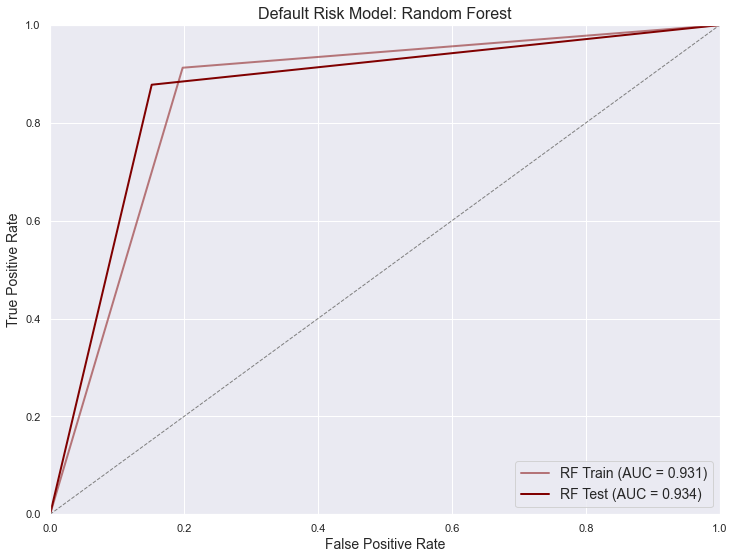

In [893]:
Y_pred_train = forest_gs.predict(X_train).astype(int)
Y_pred_test = forest_gs.predict(X_test).astype(int)

forest_scores_train = forest_gs.predict_proba(X_train)[:, 1]
forest_scores_test = forest_gs.predict_proba(X_test)[:, 1]

forest_fpr_train, forest_tpr_train, _ = roc_curve(Y_train.astype(int), Y_pred_train)
forest_fpr_test, forest_tpr_test, _ = roc_curve(Y_test.astype(int), Y_pred_test)

plt.figure(figsize=(12, 9))

plt.plot(forest_fpr_train, forest_tpr_train, color='maroon', lw=2, alpha = 0.5, linestyle = '-',
         label=f'RF Train (AUC = {roc_auc_score(Y_train, forest_scores_train):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='maroon', lw=2, linestyle = '-',
         label=f'RF Test (AUC = {roc_auc_score(Y_test, forest_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Default Risk Model: Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

In [894]:
#Confusion Matrix
rf_cnf_matrix = confusion_matrix(Y_test.astype(int), Y_pred_test)

#AUC
print(f'RF Train AUC = {roc_auc_score(Y_train, forest_scores_train):0.3f}')
print(f'RF Test AUC = {roc_auc_score(Y_test, forest_scores_test):0.3f}')

RF Train AUC = 0.931
RF Test AUC = 0.934


# Gradiant Boosting

In [895]:
gbm = GradientBoostingClassifier(random_state=314)

param_grid = {'n_estimators': [100, 300, 500], 
              'learning_rate': [0.05, 0.1],
              'max_depth': [3, 6],
              'min_samples_leaf': [0.01, 0.02, 0.05]}

gbm_rs = RandomizedSearchCV(gbm, param_grid, cv=3, n_iter=10, n_jobs=-1, random_state=314)

gbm_rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=314),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 6],
                                        'min_samples_leaf': [0.01, 0.02, 0.05],
                                        'n_estimators': [100, 300, 500]},
                   random_state=314)

In [896]:
print ('Best GBM Parameters:', gbm_rs.best_params_)

Best GBM Parameters: {'n_estimators': 100, 'min_samples_leaf': 0.05, 'max_depth': 6, 'learning_rate': 0.05}


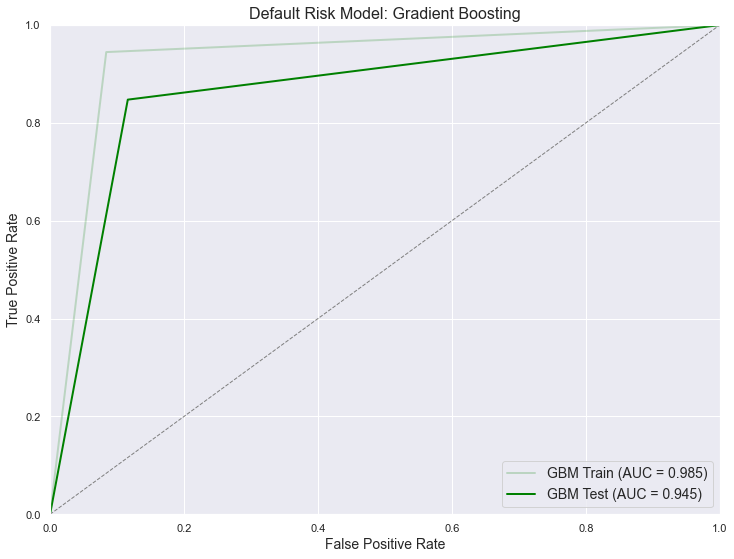

In [897]:
Y_pred_train = gbm_rs.predict(X_train).astype(int)
Y_pred_test = gbm_rs.predict(X_test).astype(int)

gbm_scores_train = gbm_rs.predict_proba(X_train)[:, 1]
gbm_scores_test = gbm_rs.predict_proba(X_test)[:, 1]

gbm_fpr_train, gbm_tpr_train, _ = roc_curve(Y_train.astype(int), Y_pred_train)
gbm_fpr_test, gbm_tpr_test, _ = roc_curve(Y_test.astype(int), Y_pred_test)

plt.figure(figsize=(12, 9))

plt.plot(gbm_fpr_train, gbm_tpr_train, color='green', lw=2, alpha = 0.2, linestyle = '-',
         label=f'GBM Train (AUC = {roc_auc_score(Y_train, gbm_scores_train):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='green', lw=2, linestyle = '-',
         label=f'GBM Test (AUC = {roc_auc_score(Y_test, gbm_scores_test):0.3f})')


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Default Risk Model: Gradient Boosting', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

In [898]:
#Confusion Matrix
gbm_cnf_matrix = confusion_matrix(Y_test.astype(int), Y_pred_test)

#AUC
print(f'GBM Train AUC = {roc_auc_score(Y_train, gbm_scores_train):0.3f}')
print(f'GBM Test AUC = {roc_auc_score(Y_test, gbm_scores_test):0.3f}')

GBM Train AUC = 0.985
GBM Test AUC = 0.945


# Model Comparision

## AUC

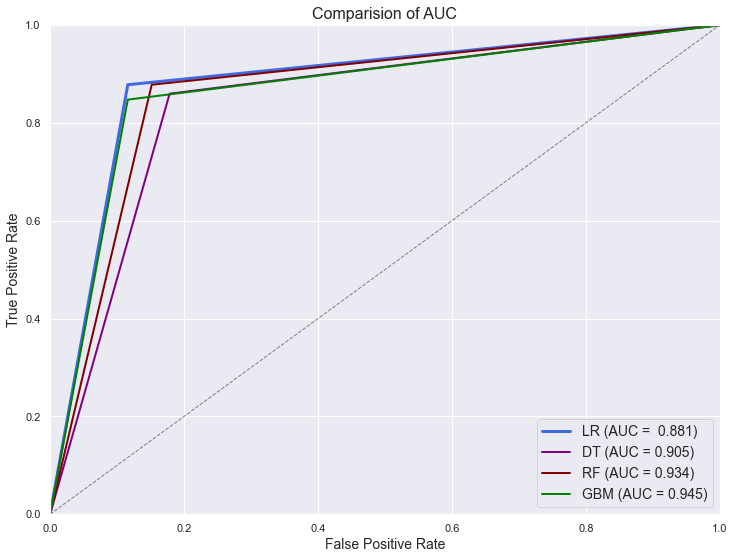

In [899]:
plt.figure(figsize=(12, 9))

plt.plot(fpr, tpr, color='royalblue', lw=3, label=f'LR (AUC = {auc: 0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='purple', lw=2, linestyle = '-',
         label=f'DT (AUC = {roc_auc_score(Y_test, tree_scores_test):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='maroon', lw=2, linestyle = '-',
         label=f'RF (AUC = {roc_auc_score(Y_test, forest_scores_test):0.3f})')

plt.plot(gbm_fpr_test, gbm_tpr_test, color='green', lw=2, linestyle = '-',
    label=f'GBM (AUC = {roc_auc_score(Y_test, gbm_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Comparision of AUC', fontsize=16)
plt.legend(loc='lower right', fontsize=14);

## Confusion Matrix

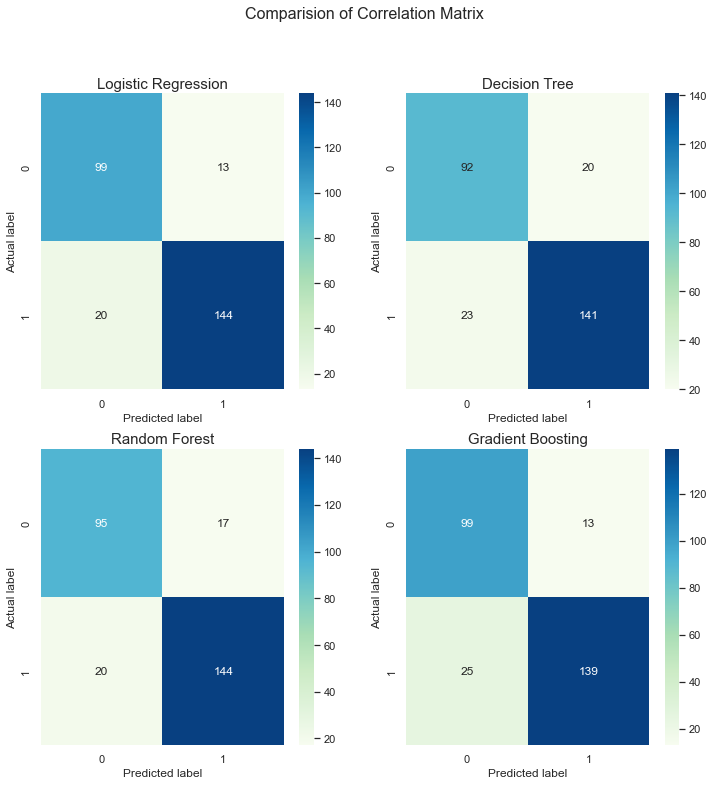

In [900]:
# Visualizing Confusion Matrix
conf_matrix = [LR_cnf_matrix , DT_cnf_matrix, rf_cnf_matrix , gbm_cnf_matrix]
conf_matrix_name = ['Logistic Regression' , 'Decision Tree', 'Random Forest' , 'Gradient Boosting']
fig, axes= plt.subplots(nrows=2, ncols=2, figsize = (12,12))

for i, x in enumerate(axes.flat):
    mat_name = conf_matrix_name[i]
    mat = conf_matrix[i]
    sns.heatmap(pd.DataFrame(mat), annot=True, cmap="GnBu" ,fmt='g', ax=x)
    x.set_title(f'{mat_name}', size = 15, pad = 5)
    x.set_xlabel('Predicted label')
    x.set_ylabel('Actual label')
    fig.suptitle('Comparision of Correlation Matrix', fontsize=16)

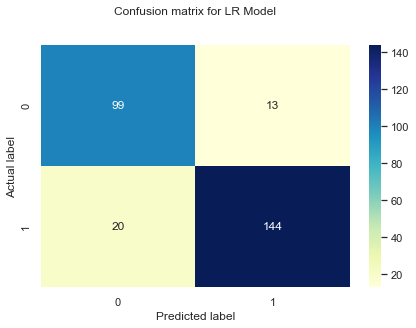

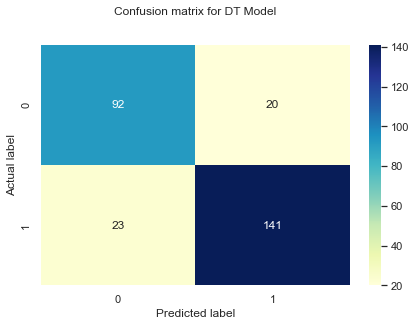

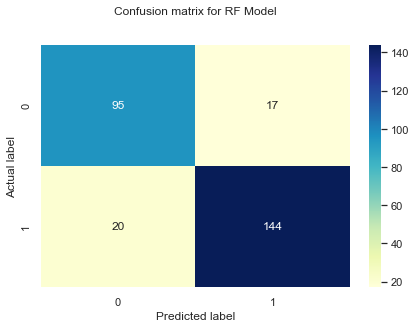

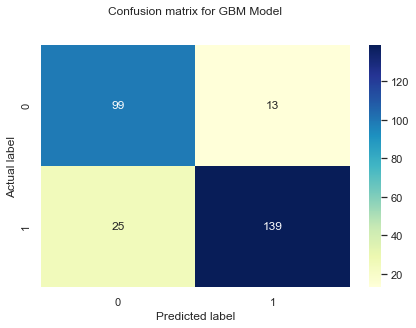

In [762]:
# create heatmap LR
sns.heatmap(pd.DataFrame(LR_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for LR Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# create heatmap DT
sns.heatmap(pd.DataFrame(DT_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for DT Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# create heatmap RF
sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for RF Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# create heatmap GBM
sns.heatmap(pd.DataFrame(gbm_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix for GBM Model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Log Loss

In [901]:
print('LogLoss LR:', round(log_loss(Y_test, lrm.predict_proba(X_test)), 5))
print('LogLoss DT:', round(log_loss(Y_test, final_dtm.predict_proba(X_test)), 5))
print('LogLoss RF:', round(log_loss(Y_test, forest_gs.predict_proba(X_test)), 5))
print('LogLoss GBM:', round(log_loss(Y_test,gbm_rs.predict_proba(X_test)), 5))

LogLoss LR: 0.31072
LogLoss DT: 0.38489
LogLoss RF: 0.37161
LogLoss GBM: 0.31394
